In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('df_filtered.csv')

In [6]:
df=df.drop(columns='Unnamed: 0')

In [7]:
df['category'].unique()

array(['IT', 'Architecture', 'Agriculture', 'Advertising', 'Management',
       'Electrical', 'Manufacturing', 'Automation', 'Consultant',
       'Finance', 'Security', 'Recruitment', 'Pharmaceutical', 'Bank',
       'Real Estate', 'Healthcare', 'Restaurant', 'Insurance',
       'Telecommunication', 'Services', 'Logistics', 'Mechanical',
       'Social Media', 'Human Resources', 'Engineering', 'Marketing',
       'Electronics', 'Construction', 'Education', 'Legal', 'Networking',
       'Customer Service', 'Training', 'Computer', 'Hospitality', 'Sales',
       'Accounting', 'Medical', 'Bpo', 'Transportation', 'Internet',
       'Energy', 'Loans', 'PR', 'Teacher', 'Food Service',
       'Law Enforcement'], dtype=object)

In [8]:
df.columns

Index(['category', 'city', 'company_name', 'crawl_timestamp',
       'job_description', 'postdate_yyyymmdd', 'post_date',
       'postdate_in_indexname_format', 'job_title', 'job_type', 'new_date',
       'year', 'month', 'day', 'weekday', 'hour'],
      dtype='object')

In [9]:
import pandas as pd

# Sample DataFrame



# Create JSON format
df['info'] = df.apply(lambda row: {
    "job-date": row['post_date'],
    "company-name": row['company_name'],
    "job-title": row['job_title']
}, axis=1)

# Convert to JSON format
json_output = df[['info']].to_dict(orient='records')

print(json_output)


[{'info': {'job-date': '2021-07-01', 'company-name': 'HTSM Technologies Pvt Ltd', 'job-title': 'Dot Net Developer'}}, {'info': {'job-date': '2021-07-08', 'company-name': 'HSBC', 'job-title': 'Senior Project Manager/Wholesale IT'}}, {'info': {'job-date': '2021-07-08', 'company-name': 'bajajallianz', 'job-title': 'Deputy Manager Agri. Business'}}, {'info': {'job-date': '2021-07-08', 'company-name': 'Balbix India Pvt. Ltd', 'job-title': 'Full Stack Developer'}}, {'info': {'job-date': '2021-07-08', 'company-name': 'Deutsche Bank', 'job-title': 'AVP – Java Engineer'}}, {'info': {'job-date': '2021-07-08', 'company-name': 'Foolproof Ltd.', 'job-title': 'Principal Visual Designer'}}, {'info': {'job-date': '2021-07-08', 'company-name': 'Société Générale', 'job-title': 'Analyst - Operational Risk'}}, {'info': {'job-date': '2021-07-08', 'company-name': 'Outline India', 'job-title': 'BUSINESS DEVELOPMENT/CSR EXECUTIVE'}}, {'info': {'job-date': '2021-07-08', 'company-name': 'Havas Media', 'job-titl

In [10]:
import pickle

In [11]:
with open('dataframe_with_info.pkl', 'wb') as f:
    pickle.dump(df, f)

print("DataFrame has been pickled successfully.")

DataFrame has been pickled successfully.


Plotting a graph of Advertising Data over a period of time

note: this is existing data's graph


C:\Users\Isha\AppData\Local\Temp\ipykernel_1136\3238091083.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  advertising_jobs['postdate_yyyymmdd'] = pd.to_datetime(advertising_jobs['postdate_yyyymmdd'], format='%Y%m%d')


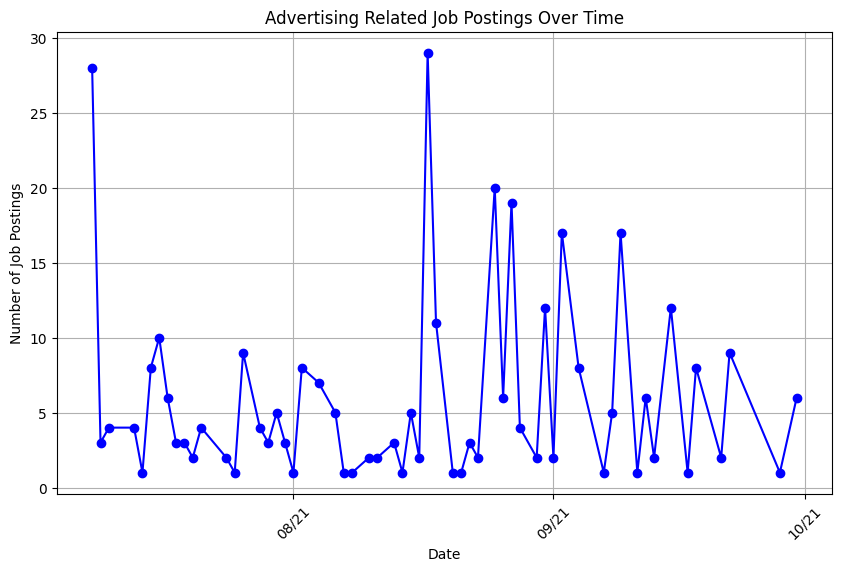

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data loading


# Step 1: Filter the data for advertising-related jobs
advertising_jobs = df[df['category'].str.contains('advertising', case=False, na=False) | df['job_title'].str.contains('advertising', case=False, na=False)]

# Step 2: Convert 'postdate_yyyymmdd' to datetime format
advertising_jobs['postdate_yyyymmdd'] = pd.to_datetime(advertising_jobs['postdate_yyyymmdd'], format='%Y%m%d')

# Step 3: Group by 'postdate_yyyymmdd' and count job postings
job_counts = advertising_jobs.groupby('postdate_yyyymmdd').size().reset_index(name='count')

# Step 4: Plot the data
plt.figure(figsize=(10, 6))
plt.plot(job_counts['postdate_yyyymmdd'], job_counts['count'], marker='o', linestyle='-', color='b')

# Format the x-axis with the desired date format
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m/%y'))  # e.g., "7/21", "8/21"
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())

plt.xlabel('Date')
plt.ylabel('Number of Job Postings')
plt.title('Advertising Related Job Postings Over Time')
plt.xticks(rotation=45)
plt.grid()
plt.show()


Using ARIMA model

C:\Users\Isha\AppData\Local\Temp\ipykernel_1136\74837448.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<DatetimeArray>
['2021-07-08 00:00:00', '2021-07-08 00:00:00', '2021-07-08 00:00:00',
 '2021-07-08 00:00:00', '2021-07-08 00:00:00', '2021-07-08 00:00:00',
 '2021-07-08 00:00:00', '2021-07-08 00:00:00', '2021-07-08 00:00:00',
 '2021-07-08 00:00:00',
 ...
 '2021-09-22 00:00:00', '2021-09-22 00:00:00', '2021-09-22 00:00:00',
 '2021-09-28 00:00:00', '2021-09-30 00:00:00', '2021-09-30 00:00:00',
 '2021-09-30 00:00:00', '2021-09-30 00:00:00', '2021-09-30 00:00:00',
 '2021-09-30 00:00:00']
Length: 349, dtype: datetime64[ns]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  advertising_jobs.loc[:, 'postdate_yyyymmdd'] = pd.to_datetime(advertising_jobs['postdate_yyyymmdd'], format='%Y%m%d')


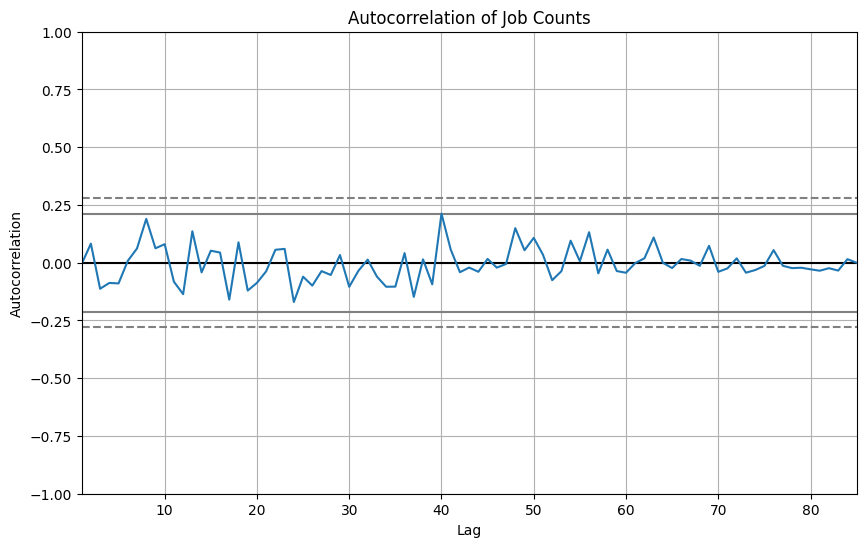

c:\Users\Isha\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Isha\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


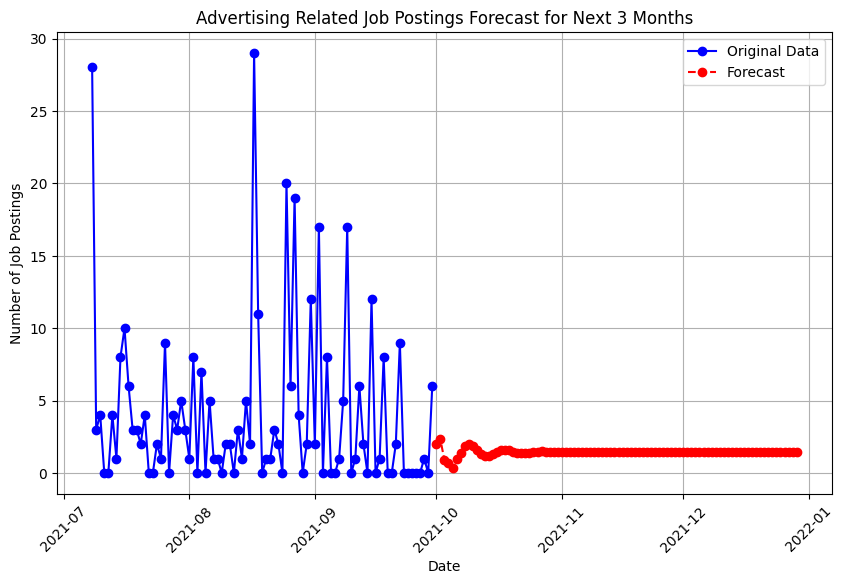

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot

# Step 1: Filter the data for advertising-related jobs
advertising_jobs = df[df['category'].str.contains('advertising', case=False, na=False) | df['job_title'].str.contains('advertising', case=False, na=False)].copy()

# Step 2: Convert 'postdate_yyyymmdd' to datetime format
advertising_jobs.loc[:, 'postdate_yyyymmdd'] = pd.to_datetime(advertising_jobs['postdate_yyyymmdd'], format='%Y%m%d')

# Step 3: Group by 'postdate_yyyymmdd' and count job postings
job_counts = advertising_jobs.groupby('postdate_yyyymmdd').size().reset_index(name='count')

# Ensure the data is sorted and has consistent frequency
job_counts.set_index('postdate_yyyymmdd', inplace=True)
job_counts = job_counts.asfreq('D', fill_value=0)  # Fill missing days with 0 count

# Step 4: Plot the autocorrelation to choose parameters
plt.figure(figsize=(10, 6))
autocorrelation_plot(job_counts['count'])
plt.title('Autocorrelation of Job Counts')
plt.show()

# Step 5: Fit ARIMA model with tuned parameters
# Start with (p, d, q) = (1, 1, 1) and adjust based on autocorrelation plot
model = ARIMA(job_counts['count'], order=(5, 1, 2))  # Example adjustment; tune as needed
model_fit = model.fit()

# Step 6: Forecast the next 3 months
future_steps = 90  # Predict the next 90 days (approximately 3 months)
forecast = model_fit.forecast(steps=future_steps)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(job_counts.index, job_counts['count'], marker='o', linestyle='-', color='b', label='Original Data')
plt.plot(forecast.index, forecast, marker='o', linestyle='--', color='r', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Job Postings')
plt.title('Advertising Related Job Postings Forecast for Next 3 Months')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


Using SARIMA model

PREDICTION ON FUTURE


c:\Users\Isha\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


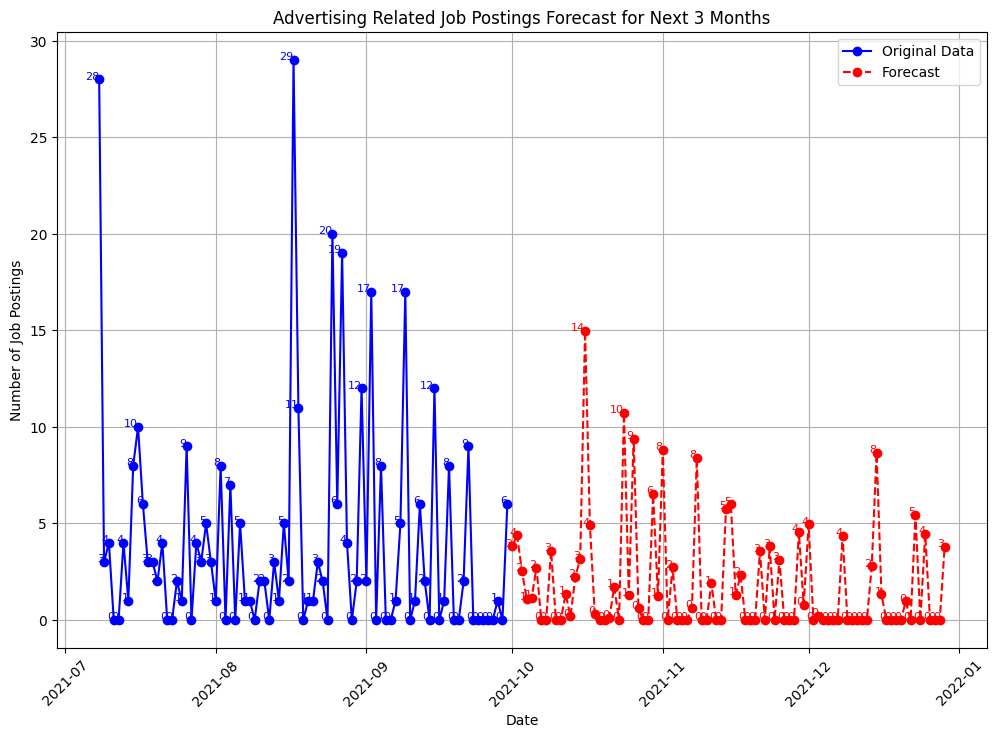

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model
model = SARIMAX(job_counts['count'], 
                 order=(1, 1, 1),  # Adjust ARIMA parameters
                 seasonal_order=(1, 1, 1, 30))  # Adjust seasonal parameters
model_fit = model.fit()

# Forecast the next 3 months
future_steps = 90  # Predict the next 90 days (approximately 3 months)
forecast = model_fit.get_forecast(steps=future_steps)
forecast_index = pd.date_range(start=job_counts.index[-1] + pd.Timedelta(days=1), periods=future_steps, freq='D')
forecast_values = forecast.predicted_mean

# Set negative values to zero
forecast_values = forecast_values.clip(lower=0)

# Plot the forecast
plt.figure(figsize=(12, 8))
plt.plot(job_counts.index, job_counts['count'], marker='o', linestyle='-', color='b', label='Original Data')

# Plot the forecasted values
if not forecast_index.empty and not forecast_values.empty:
    plt.plot(forecast_index, forecast_values, marker='o', linestyle='--', color='r', label='Forecast')

# Annotate original data points
for i, (date, value) in enumerate(job_counts['count'].items()):
    plt.text(date, value, str(value), fontsize=8, color='blue', ha='right')

# Annotate forecast data points
for i, (date, value) in enumerate(zip(forecast_index, forecast_values)):
    plt.text(date, value, str(int(value)), fontsize=8, color='red', ha='right')

plt.xlabel('Date')
plt.ylabel('Number of Job Postings')
plt.title('Advertising Related Job Postings Forecast for Next 3 Months')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


PREDICTION ON ACTUAL DATA

c:\Users\Isha\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Mean Absolute Error (MAE): 11.65
Root Mean Squared Error (RMSE): 16.05


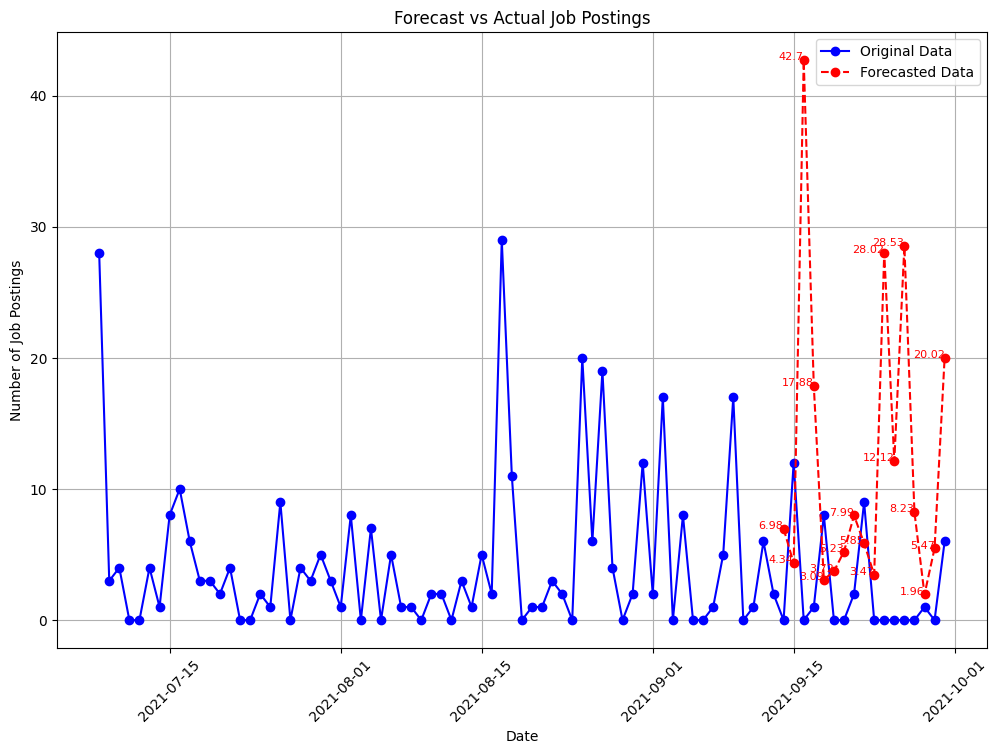

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Step 1: Split the data into training and testing sets
train_size = int(len(job_counts) * 0.8)  # Use 80% of data for training
train, test = job_counts['count'][:train_size], job_counts['count'][train_size:]

# Step 2: Fit the SARIMA model on the training data
model = SARIMAX(train, 
                 order=(1, 1, 1),  # Adjust ARIMA parameters
                 seasonal_order=(1, 1, 1, 30))  # Adjust seasonal parameters
model_fit = model.fit()

# Step 3: Make predictions on the testing data
forecast_steps = len(test)
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_index = test.index
forecast_values = forecast.predicted_mean

# Step 4: Calculate errors
mae = mean_absolute_error(test, forecast_values)
rmse = np.sqrt(mean_squared_error(test, forecast_values))

# Print the errors
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(job_counts.index, job_counts['count'], marker='o', linestyle='-', color='b', label='Original Data')
plt.plot(test.index, forecast_values, marker='o', linestyle='--', color='r', label='Forecasted Data')

# Annotate testing data points
for i, (date, value) in enumerate(zip(test.index, forecast_values)):
    plt.text(date, value, str(round(value, 2)), fontsize=8, color='red', ha='right')

plt.xlabel('Date')
plt.ylabel('Number of Job Postings')
plt.title('Forecast vs Actual Job Postings')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


In [16]:
df['category'].unique()

array(['IT', 'Architecture', 'Agriculture', 'Advertising', 'Management',
       'Electrical', 'Manufacturing', 'Automation', 'Consultant',
       'Finance', 'Security', 'Recruitment', 'Pharmaceutical', 'Bank',
       'Real Estate', 'Healthcare', 'Restaurant', 'Insurance',
       'Telecommunication', 'Services', 'Logistics', 'Mechanical',
       'Social Media', 'Human Resources', 'Engineering', 'Marketing',
       'Electronics', 'Construction', 'Education', 'Legal', 'Networking',
       'Customer Service', 'Training', 'Computer', 'Hospitality', 'Sales',
       'Accounting', 'Medical', 'Bpo', 'Transportation', 'Internet',
       'Energy', 'Loans', 'PR', 'Teacher', 'Food Service',
       'Law Enforcement'], dtype=object)

In [17]:
with open('df_filtered.csv', 'wb') as f:
    pickle.dump(predictions, f)

NameError: name 'predictions' is not defined

STORING ALL SARIMA IN PICKLE FILES


In [22]:
import pandas as pd
import pickle
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import json

def fit_sarima_and_forecast(df, categories, forecast_steps=90, plot=False):
    predictions = {}

    for category in categories:
        # Filter the data for the current category
        category_jobs = df[df['category'].str.contains(category, case=False, na=False) | df['job_title'].str.contains(category, case=False, na=False)].copy()

        # Convert 'postdate_yyyymmdd' to datetime format
        category_jobs['postdate_yyyymmdd'] = pd.to_datetime(category_jobs['postdate_yyyymmdd'], format='%Y%m%d')

        # Group by 'postdate_yyyymmdd' and count job postings
        job_counts = category_jobs.groupby('postdate_yyyymmdd').size().reset_index(name='count')
        job_counts.set_index('postdate_yyyymmdd', inplace=True)
        job_counts = job_counts.asfreq('D', fill_value=0)  # Fill missing days with 0 count

        # Fit SARIMA model
        model = SARIMAX(job_counts['count'], 
                        order=(1, 1, 1),  # Adjust ARIMA parameters as needed
                        seasonal_order=(1, 1, 1, 30))  # Adjust seasonal parameters as needed
        model_fit = model.fit()

        # Forecast the next 3 months
        forecast = model_fit.get_forecast(steps=forecast_steps)
        forecast_index = pd.date_range(start=job_counts.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
        forecast_values = forecast.predicted_mean

        # Set negative values to zero
        forecast_values = forecast_values.clip(lower=0)

        # Store predictions in a DataFrame
        forecast_df = pd.DataFrame({
            'date': forecast_index,
            'forecast': forecast_values
        })

        # Save the forecast DataFrame in the predictions dictionary
        predictions[category] = forecast_df.to_dict(orient='records')  # Convert to dictionary format

        # Plot the forecast if needed
        if plot:
            fig, ax = plt.subplots(figsize=(12, 8))
            ax.plot(job_counts.index, job_counts['count'], marker='o', linestyle='-', color='b', label='Original Data')
            ax.plot(forecast_index, forecast_values, marker='o', linestyle='--', color='r', label='Forecast')
            ax.set_xlabel('Date')
            ax.set_ylabel('Number of Job Postings')
            ax.set_title(f'{category} Job Postings Forecast for Next 3 Months')
            plt.xticks(rotation=45)
            ax.legend()
            ax.grid()
            plt.show()

    # Save all predictions to a single pickled file
    with open('sarima_predictions.pkl', 'wb') as f:
        pickle.dump(predictions, f)

    # Convert predictions to JSON format
    predictions_json = json.dumps(predictions)

    print("SARIMA predictions have been saved to 'sarima_predictions.pkl'.")
    return predictions_json  # Return JSON formatted string

# Load the DataFrame from the pickled file
with open('df_filtered.pkl', 'rb') as file:
    df = pickle.load(file)

# List of categories
categories = ['IT', 'Architecture', 'Agriculture', 'Advertising', 'Management',
              'Electrical', 'Manufacturing', 'Automation', 'Consultant', 'Finance',
              'Security', 'Recruitment', 'Pharmaceutical', 'Bank', 'Real Estate',
              'Healthcare', 'Restaurant', 'Insurance', 'Telecommunication', 'Services',
              'Logistics', 'Mechanical', 'Social Media', 'Human Resources', 'Engineering',
              'Marketing', 'Electronics', 'Construction', 'Education', 'Legal', 'Networking',
              'Customer Service', 'Training', 'Computer', 'Hospitality', 'Sales', 'Accounting',
              'Medical', 'Bpo', 'Transportation', 'Internet', 'Energy', 'Loans', 'PR', 'Teacher',
              'Food Service', 'Law Enforcement']

# Call the function for all categories
predictions_json = fit_sarima_and_forecast(df, categories, plot=True)

# Print or handle the JSON output as needed
print(predictions_json)


FileNotFoundError: [Errno 2] No such file or directory: 'df_filtered.pkl'

In [5]:
import pandas as pd

# Sample DataFrame definition (Replace this with your actual data loading code)
job_counts = pd.DataFrame({
    'postdate_yyyymmdd': pd.date_range(start='2023-01-01', periods=100, freq='D'),
    'count': np.random.randint(0, 100, size=100)
})
job_counts.set_index('postdate_yyyymmdd', inplace=True)


c:\Users\Isha\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Isha\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Isha\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\Isha\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn(

Mean Absolute Error (MAE): 27.85
Root Mean Squared Error (RMSE): 31.82
F1 Score: 0.48


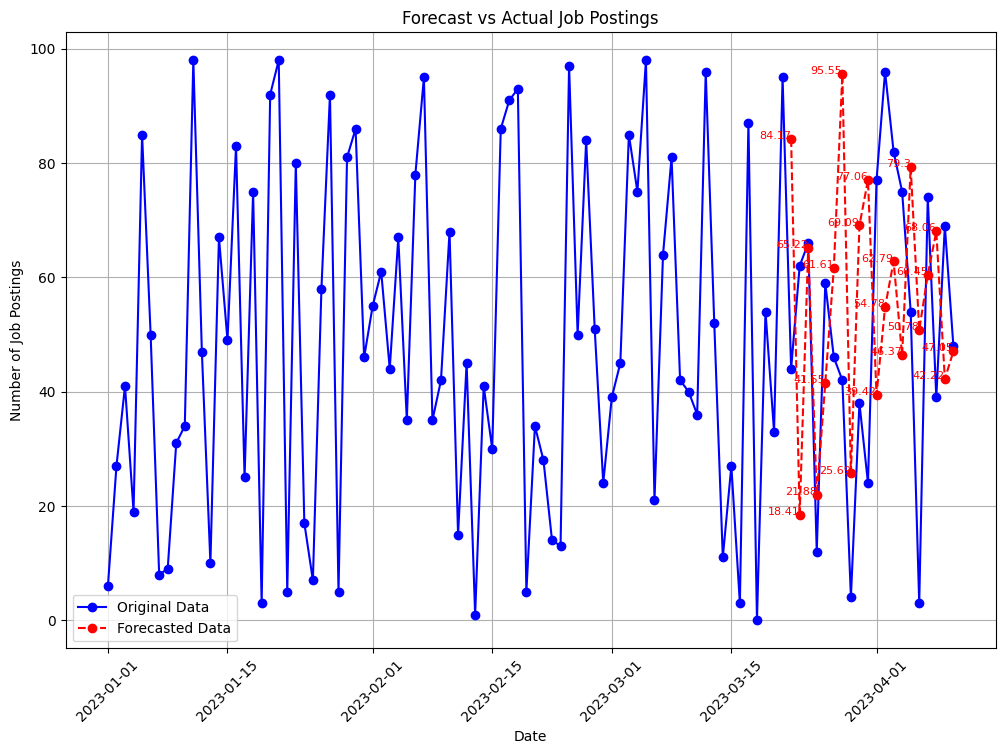

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, f1_score

# Step 1: Split the data into training and testing sets
train_size = int(len(job_counts) * 0.8)  # Use 80% of data for training
train, test = job_counts['count'][:train_size], job_counts['count'][train_size:]

# Step 2: Fit the SARIMA model on the training data
model = SARIMAX(train, 
                 order=(1, 1, 1),  # Adjust ARIMA parameters
                 seasonal_order=(1, 1, 1, 30))  # Adjust seasonal parameters
model_fit = model.fit()

# Step 3: Make predictions on the testing data
forecast_steps = len(test)
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_index = test.index
forecast_values = forecast.predicted_mean

# Step 4: Calculate errors
mae = mean_absolute_error(test, forecast_values)
rmse = np.sqrt(mean_squared_error(test, forecast_values))

# Print the errors
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Step 5: Convert predictions and actual values into binary classification
# Example threshold can be set as the median or mean of the actual values
threshold = test.median()  # You may want to adjust the threshold based on your data
bin_actual = (test > threshold).astype(int)
bin_forecast = (forecast_values > threshold).astype(int)

# Calculate F1 score
f1 = f1_score(bin_actual, bin_forecast)
print(f"F1 Score: {f1:.2f}")

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(job_counts.index, job_counts['count'], marker='o', linestyle='-', color='b', label='Original Data')
plt.plot(test.index, forecast_values, marker='o', linestyle='--', color='r', label='Forecasted Data')

# Annotate testing data points
for i, (date, value) in enumerate(zip(test.index, forecast_values)):
    plt.text(date, value, str(round(value, 2)), fontsize=8, color='red', ha='right')

plt.xlabel('Date')
plt.ylabel('Number of Job Postings')
plt.title('Forecast vs Actual Job Postings')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()



c:\Users\Isha\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Isha\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Isha\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


F1 Score: 0.00


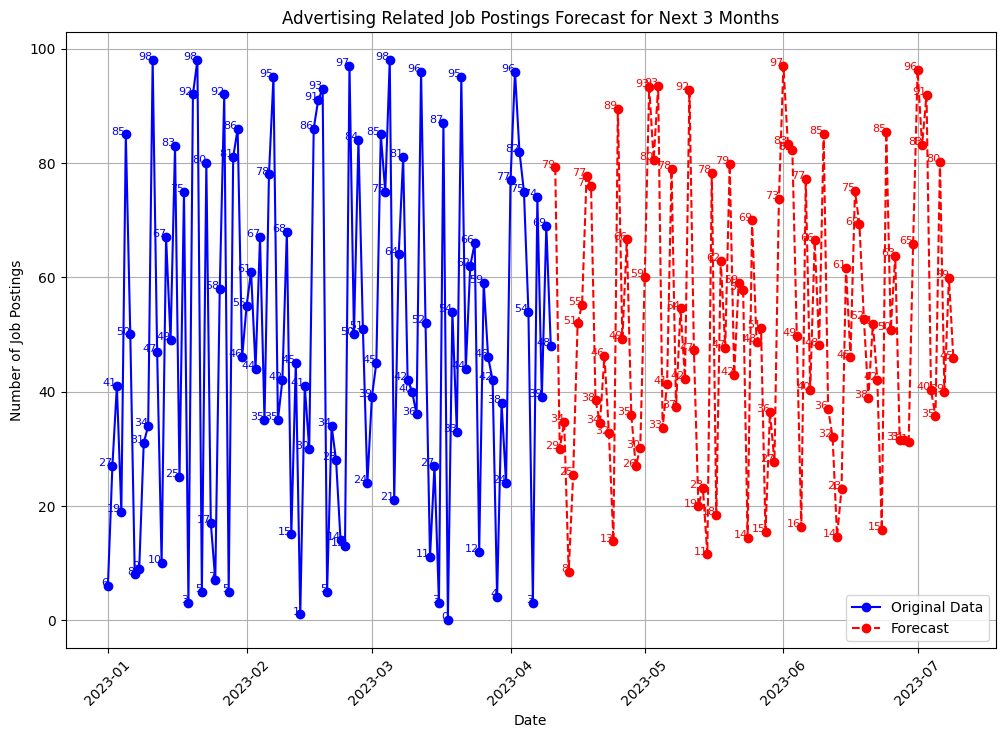

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import f1_score

# Assuming job_counts DataFrame is already defined
# job_counts = pd.DataFrame({'count': ...}, index=pd.date_range(start='2021-01-01', periods=365, freq='D'))

# Fit SARIMA model
model = SARIMAX(job_counts['count'], 
                order=(1, 1, 1),  # Adjust ARIMA parameters
                seasonal_order=(1, 1, 1, 30))  # Adjust seasonal parameters
model_fit = model.fit()

# Forecast the next 3 months
future_steps = 90  # Predict the next 90 days (approximately 3 months)
forecast = model_fit.get_forecast(steps=future_steps)
forecast_index = pd.date_range(start=job_counts.index[-1] + pd.Timedelta(days=1), periods=future_steps, freq='D')
forecast_values = forecast.predicted_mean

# Set negative values to zero
forecast_values = forecast_values.clip(lower=0)

# Create a DataFrame for plotting and calculations
forecast_df = pd.DataFrame({
    'date': forecast_index,
    'forecast': forecast_values
}).set_index('date')

# Merge with actual data for comparison
full_df = pd.concat([job_counts, forecast_df], axis=1)
full_df.columns = ['actual', 'forecast']

# Create binary classification based on the median of actual values
threshold = job_counts['count'].median()
full_df['bin_actual'] = (full_df['actual'] > threshold).astype(int)
full_df['bin_forecast'] = (full_df['forecast'] > threshold).astype(int)

# Calculate F1 score
f1 = f1_score(full_df['bin_actual'].dropna(), full_df['bin_forecast'].dropna())
print(f"F1 Score: {f1:.2f}")

# Plot the forecast
plt.figure(figsize=(12, 8))
plt.plot(job_counts.index, job_counts['count'], marker='o', linestyle='-', color='b', label='Original Data')

# Plot the forecasted values
if not forecast_index.empty and not forecast_values.empty:
    plt.plot(forecast_index, forecast_values, marker='o', linestyle='--', color='r', label='Forecast')

# Annotate original data points
for i, (date, value) in enumerate(job_counts['count'].items()):
    plt.text(date, value, str(value), fontsize=8, color='blue', ha='right')

# Annotate forecast data points
for i, (date, value) in enumerate(zip(forecast_index, forecast_values)):
    plt.text(date, value, str(int(value)), fontsize=8, color='red', ha='right')

plt.xlabel('Date')
plt.ylabel('Number of Job Postings')
plt.title('Advertising Related Job Postings Forecast for Next 3 Months')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


c:\Users\Isha\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Isha\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Isha\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


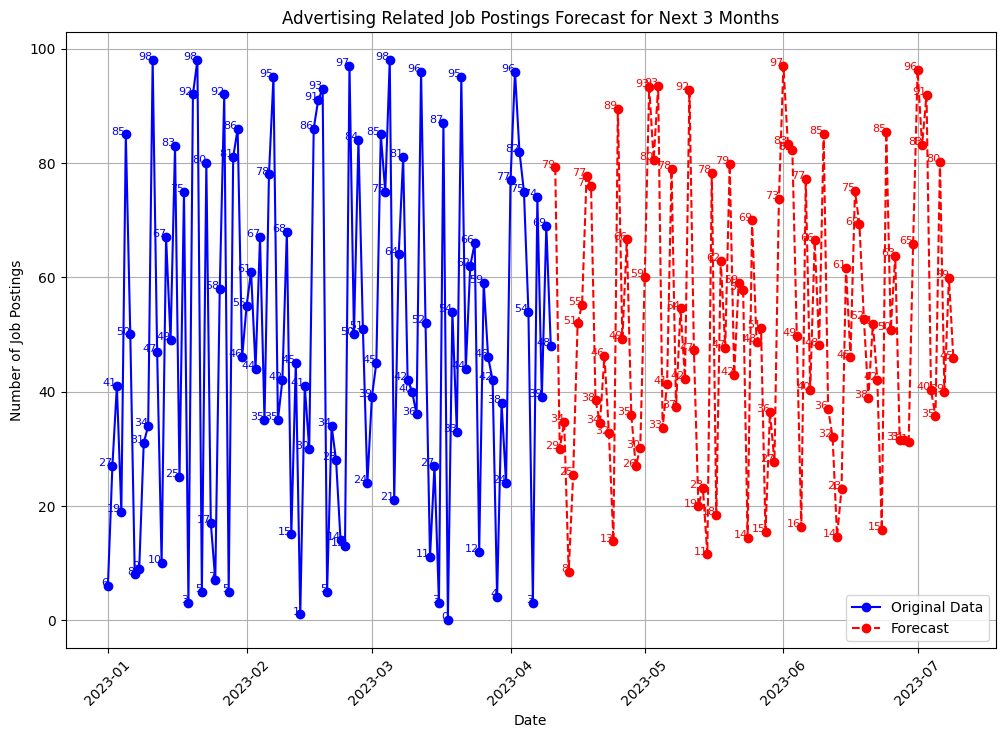

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model
model = SARIMAX(job_counts['count'], 
                 order=(1, 1, 1),  # Adjust ARIMA parameters
                 seasonal_order=(1, 1, 1, 30))  # Adjust seasonal parameters
model_fit = model.fit()

# Forecast the next 3 months
future_steps = 90  # Predict the next 90 days (approximately 3 months)
forecast = model_fit.get_forecast(steps=future_steps)
forecast_index = pd.date_range(start=job_counts.index[-1] + pd.Timedelta(days=1), periods=future_steps, freq='D')
forecast_values = forecast.predicted_mean

# Set negative values to zero
forecast_values = forecast_values.clip(lower=0)

# Plot the forecast
plt.figure(figsize=(12, 8))
plt.plot(job_counts.index, job_counts['count'], marker='o', linestyle='-', color='b', label='Original Data')

# Plot the forecasted values
if not forecast_index.empty and not forecast_values.empty:
    plt.plot(forecast_index, forecast_values, marker='o', linestyle='--', color='r', label='Forecast')

# Annotate original data points
for i, (date, value) in enumerate(job_counts['count'].items()):
    plt.text(date, value, str(value), fontsize=8, color='blue', ha='right')

# Annotate forecast data points
for i, (date, value) in enumerate(zip(forecast_index, forecast_values)):
    plt.text(date, value, str(int(value)), fontsize=8, color='red', ha='right')

plt.xlabel('Date')
plt.ylabel('Number of Job Postings')
plt.title('Advertising Related Job Postings Forecast for Next 3 Months')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()
